### 1. Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")
df = pd.DataFrame(data)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


🔍 Insight

The dataset contains medical diagnostic features related to diabetes.

Each row represents a patient record.

The target variable is Outcome (0 = Non-diabetic, 1 = Diabetic).

### 2. Descriptive Statistics

In [3]:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000




🔍 Insight

Shows mean, min, max, std, quartiles for numerical features.

Some columns like Glucose, BloodPressure, BMI have minimum value = 0, which is medically impossible → indicates missing data.


Blood pressure : Normal - <80mmHg    ,Elevated - 80 - 89mmHg     , Hypertension - >=90mmHg

Glucose :  Normal - <140mg/dL    , Prediabetic - 140 - 99mg/dL   , Diabetic - >=200mg/dL

SkinThickness : Normal - 10-25mm     , Overfat - 25-35mm     , Obese - >35mm    

Insulin :  Normal- 2-25µU/mL     ,  Insulin Resistance - >25µU/mL   

BMI (Body Mass Index) : Underweight - <18.5kg/m²     ,Normal - 18.5-22.9kg/m²    , Overweight - 23-24.9kg/m²     , Obese - >=25kg/m²

DiabetesPedigreeFunction(DPF) : Low -  <0.3 , Moderate - 0.3-0.6 , High - >0.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 3. Missing Values Analysis & Treatment
Check missing values

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No NaNs, but zero values act as missing values in medical data.

#### Treat zero values as missing

In [6]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

#### Fill missing values using median

In [7]:
df.fillna(df.median(), inplace=True)

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

🔍 Insight

Zero values were replaced with median, which is robust to outliers.

Dataset is now clean and ready for analysis.

### 4.  Outlier Analysis & Treatment

#### Boxplot before treatment

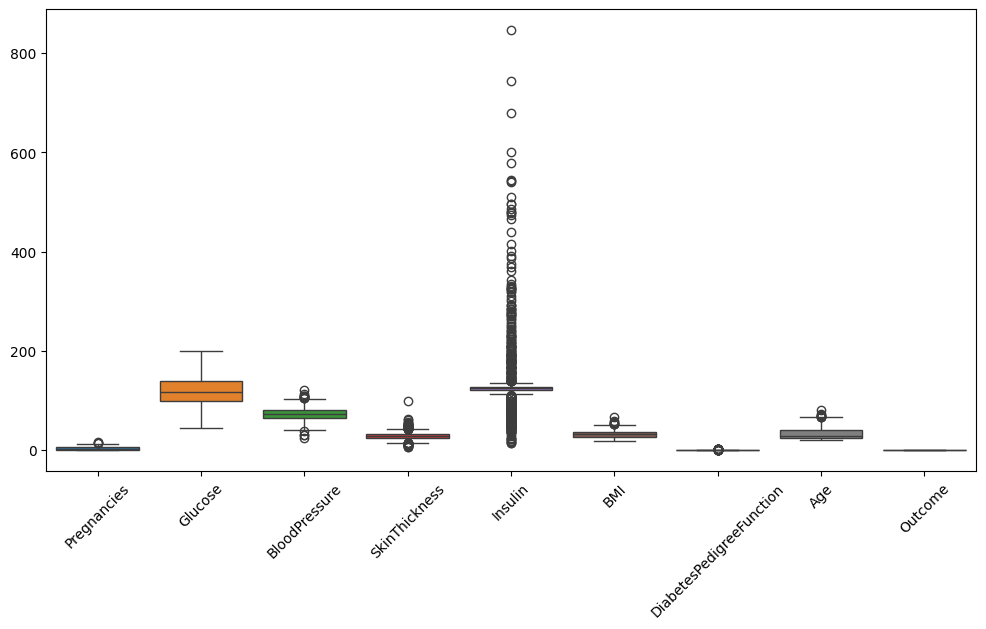

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


#### Outlier treatment using IQR method

In [62]:
# Outlier Analysis and treatment

import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("diabetes.csv")

# Function to detect outliers using IQR
def iqr_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

# Check outliers for each numeric column
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    outliers = iqr_outliers(col)
    print(f"{col} → Outliers count: {outliers.shape[0]}")

Pregnancies → Outliers count: 4
Glucose → Outliers count: 5
BloodPressure → Outliers count: 45
SkinThickness → Outliers count: 1
Insulin → Outliers count: 34
BMI → Outliers count: 19
DiabetesPedigreeFunction → Outliers count: 29
Age → Outliers count: 9
Outcome → Outliers count: 0


🔍 Insight

Medical data naturally contains extreme values.

IQR capping preserves data while controlling extreme outliers.

Prevents skewed model predictions later.


### 5. Exploratory Data Analysis (EDA)

#### Distribution of Outcome

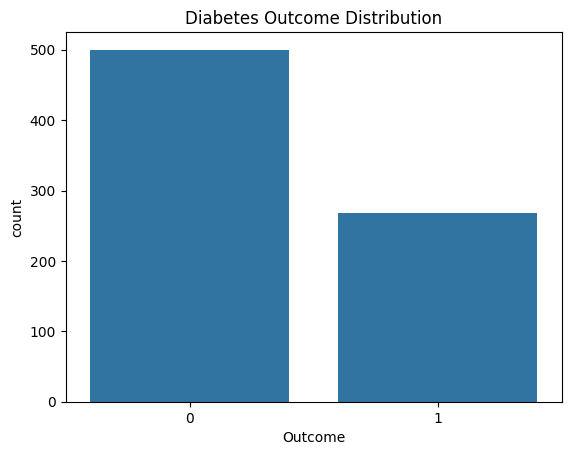

In [10]:
sns.countplot(x="Outcome", data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()

🔍 Insight

Dataset is slightly imbalanced, but acceptable.

Both diabetic and non-diabetic cases are well represented.

#### Glucose vs Outcome

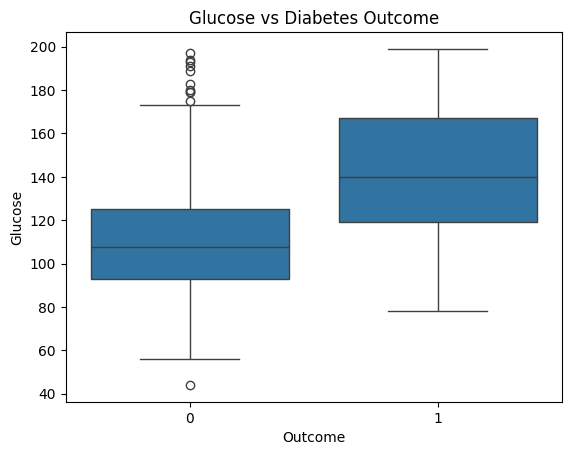

In [11]:
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Glucose vs Diabetes Outcome")
plt.show()


🔍 Insight

Diabetic patients generally have higher glucose levels.

Strong indicator for diabetes prediction.

#### BMI vs Outcome

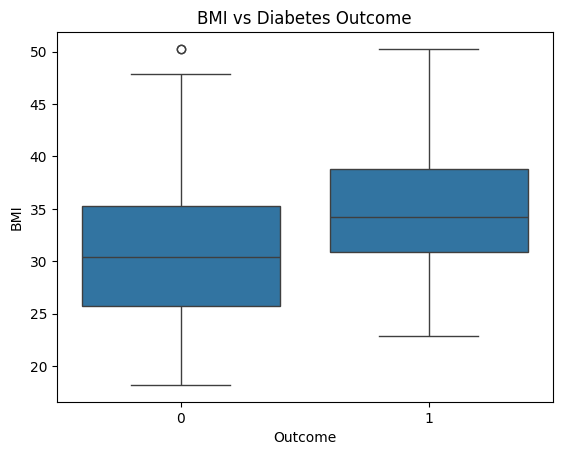

In [12]:
sns.boxplot(x="Outcome", y="BMI", data=df)
plt.title("BMI vs Diabetes Outcome")
plt.show()


🔍 Insight

Higher BMI is more common in diabetic patients.

Obesity plays a major role in diabetes risk.


### 6. Correlation Analysis

#### Correlation matrix

In [13]:
corr = df.corr()
corr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126856,0.210906,0.110471,0.097060,0.027159,-0.017398,0.549695,0.220392
Glucose,0.126856,1.000000,0.220199,0.181371,0.413981,0.233590,0.118457,0.268912,0.492782
BloodPressure,0.210906,0.220199,1.000000,0.204136,0.107028,0.286543,0.012305,0.332898,0.168971
SkinThickness,0.110471,0.181371,0.204136,1.000000,0.200742,0.559843,0.073051,0.125169,0.220111
Insulin,0.097060,0.413981,0.107028,0.200742,1.000000,0.184982,0.089418,0.170824,0.266382
BMI,0.027159,0.233590,0.286543,0.559843,0.184982,1.000000,0.138378,0.035697,0.312811
DiabetesPedigreeFunction,-0.017398,0.118457,0.012305,0.073051,0.089418,0.138378,1.000000,0.047289,0.184969
Age,0.549695,0.268912,0.332898,0.125169,0.170824,0.035697,0.047289,1.000000,0.242702
Outcome,0.220392,0.492782,0.168971,0.220111,0.266382,0.312811,0.184969,0.242702,1.000000


#### Heatmap

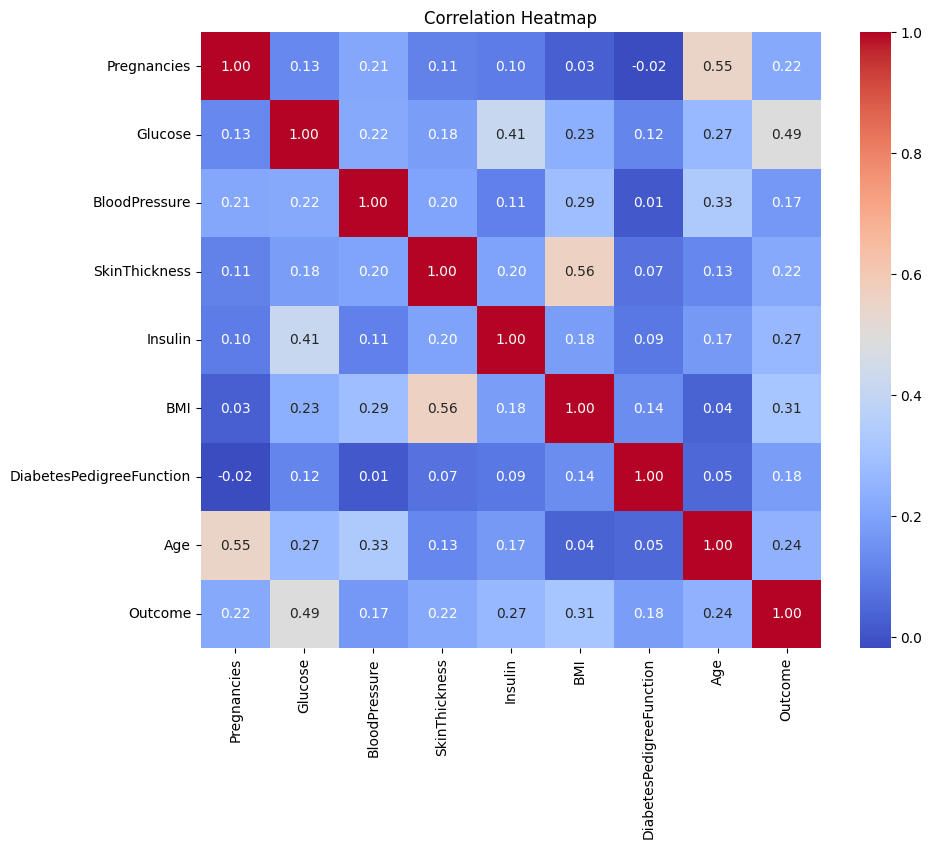

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


🔍 Insights

Glucose has the highest positive correlation with Outcome.

BMI and Age also show moderate correlation.

Features like BloodPressure have weak correlation.

Helps in feature selection for ML models.

In [20]:
df['Age'].groupby(df['Outcome']).std()

Outcome
0    11.477227
1    10.925826
Name: Age, dtype: float64

<Axes: xlabel='Age'>

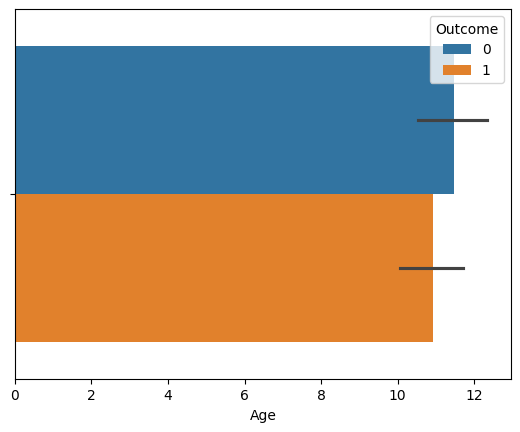

In [24]:
sns.barplot(x=df['Age'],hue=df['Outcome'],estimator='std')

In [21]:
df['Age'].groupby(df['Outcome']).mean()

Outcome
0    31.135000
1    37.052239
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Outcome'>

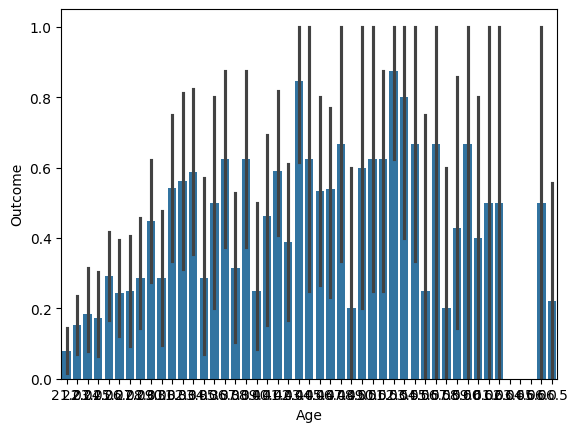

In [22]:
sns.barplot(x=df['Age'],y=df['Outcome'],estimator='mean')

C:\Users\DELL\AppData\Local\Temp\ipykernel_15876\471884197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Outcome', data=age_outcome, palette='viridis')


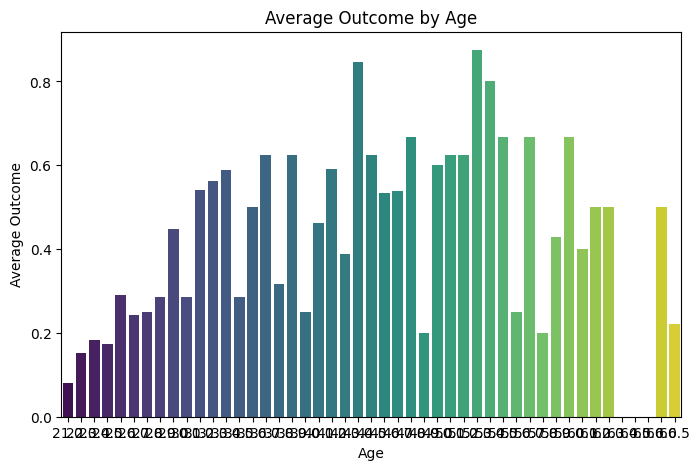

In [15]:
age_outcome = df.groupby('Age')['Outcome'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Age', y='Outcome', data=age_outcome, palette='viridis')
plt.xlabel('Age')
plt.ylabel('Average Outcome')
plt.title('Average Outcome by Age')
plt.show()

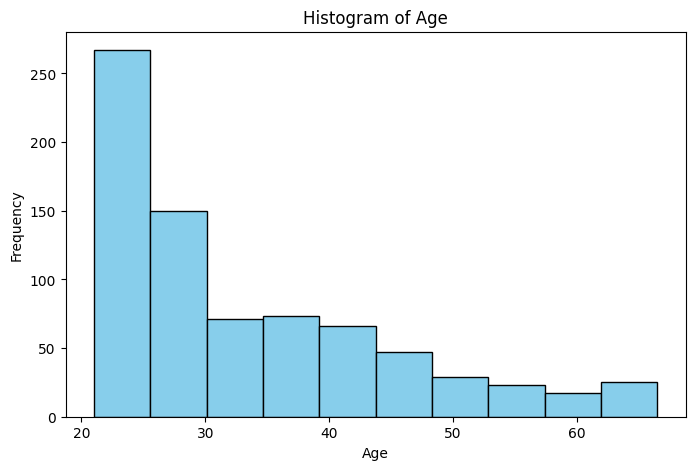

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

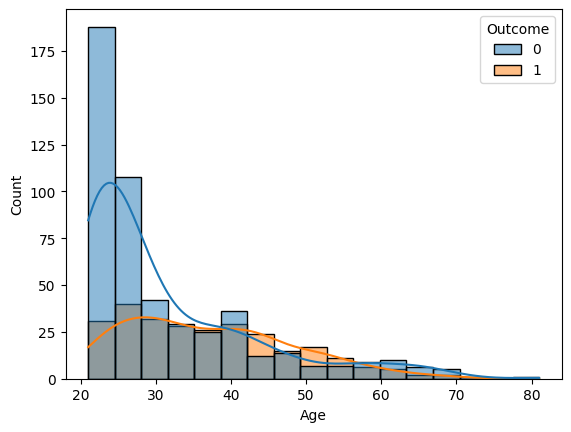

In [29]:
sns.histplot(x='Age',hue='Outcome', data=data , kde=True )
plt.show()

In [30]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

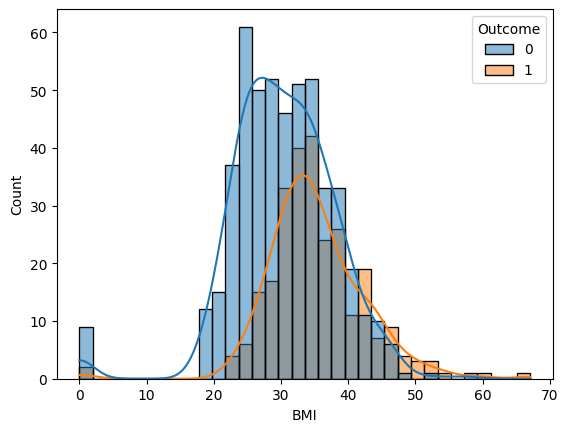

In [34]:
sns.histplot(x='BMI',hue='Outcome', data=data , kde=True )
plt.show()

## Details for Glucose

Outcome
0    26.141200
1    31.939622
Name: Glucose, dtype: float64
Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
Outcome
0    500
1    268
Name: Glucose, dtype: int64


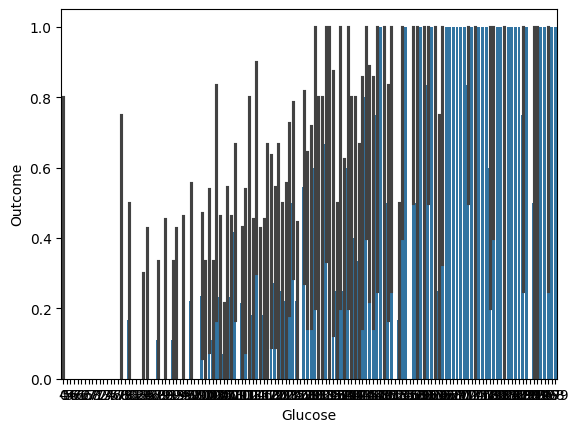

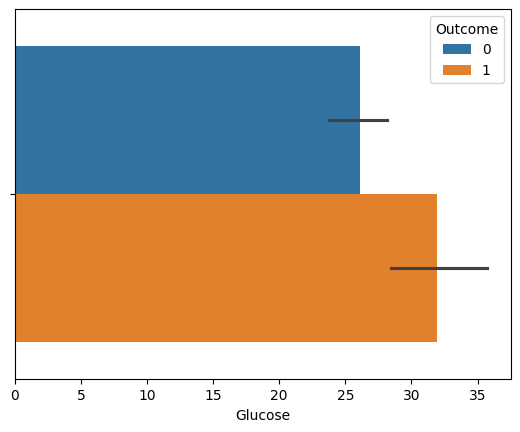

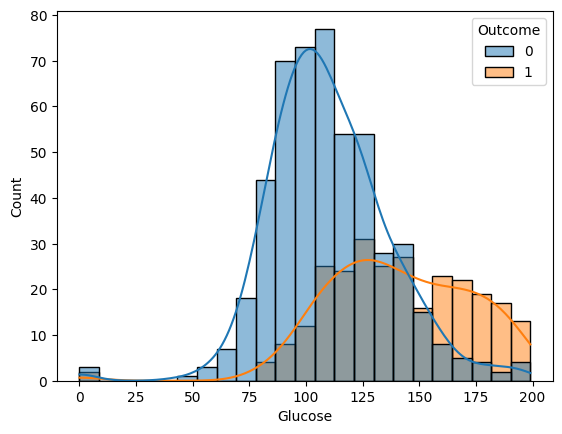

Reject H0


In [52]:
print(data['Glucose'].groupby (data['Outcome']).std())
print(data['Glucose'].groupby (data['Outcome']).mean())
print(data['Glucose'].groupby (data['Outcome']).count())
sns.barplot(x= data['Glucose'], y = data['Outcome'], estimator = 'mean' )
plt.show()
sns.barplot(x= data['Glucose'], hue =data['Outcome'], estimator = 'std')
plt.show()
sns.histplot(x = data['Glucose'], hue =data['Outcome'], data=data, kde=True)
plt.show()


die_g=df['Glucose'][df['Outcome']==1]
nondie_g=df['Glucose'][df['Outcome']==0]

# H0:Both data are same
# H1:Both are not same
from scipy.stats import ttest_ind

stat,p=ttest_ind(die_g,nondie_g)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

## Details for Age

Outcome
0    11.667655
1    10.968254
Name: Age, dtype: float64
Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64
Outcome
0    500
1    268
Name: Age, dtype: int64


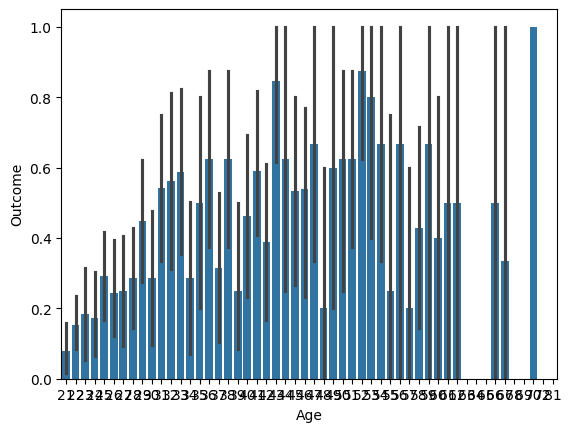

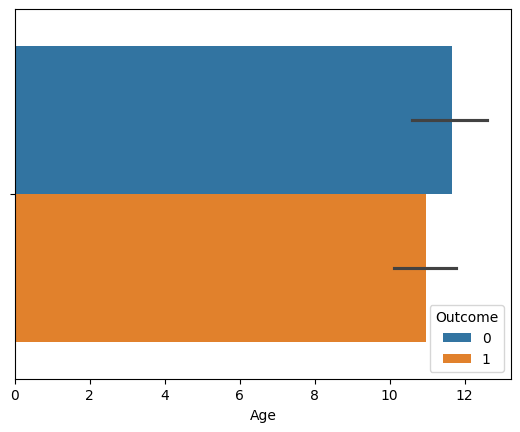

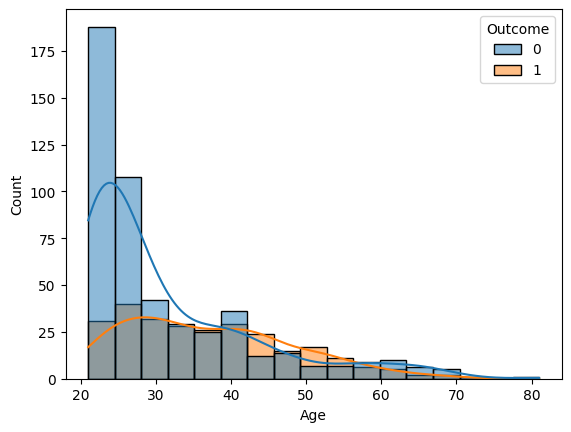

Reject H0


In [53]:
print(data['Age'].groupby (data['Outcome']).std())
print(data['Age'].groupby (data['Outcome']).mean())
print(data['Age'].groupby (data['Outcome']).count())
sns.barplot(x= data['Age'], y = data['Outcome'], estimator = 'mean' )
plt.show()
sns.barplot(x= data['Age'], hue =data['Outcome'], estimator = 'std')
plt.show()
sns.histplot(x = data['Age'], hue =data['Outcome'], data=data, kde=True)
plt.show()


die_age=df['Age'][df['Outcome']==1]
nondie_age=df['Age'][df['Outcome']==0]

# H0:Both data are same
# H1:Both are not same
from scipy.stats import ttest_ind

stat,p=ttest_ind(die_age,nondie_age)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

## Details for BMI column

Outcome
0    7.689855
1    7.262967
Name: BMI, dtype: float64
Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64
Outcome
0    500
1    268
Name: BMI, dtype: int64


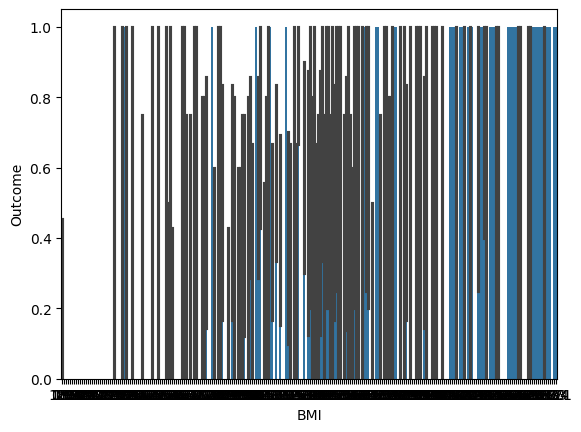

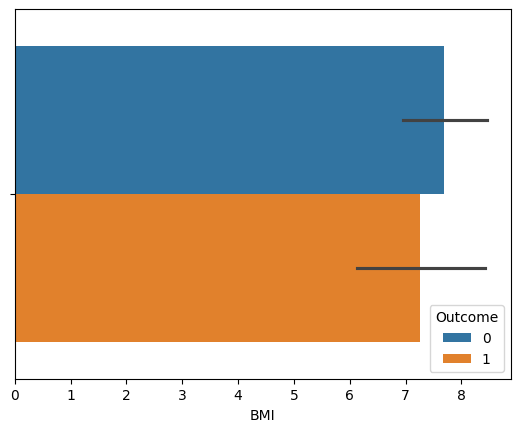

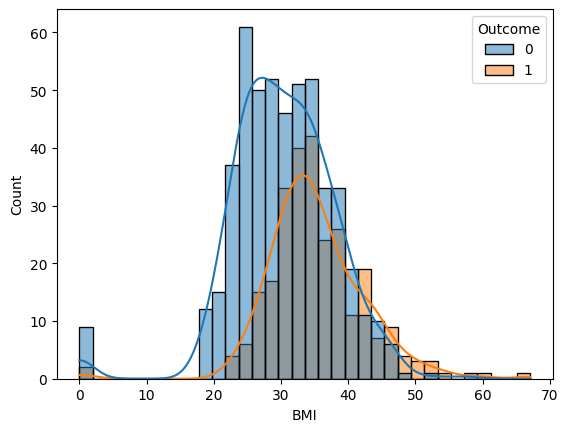

Reject H0


In [54]:
print(data['BMI'].groupby (data['Outcome']).std())
print(data['BMI'].groupby (data['Outcome']).mean())
print(data['BMI'].groupby (data['Outcome']).count())

sns.barplot(x= data['BMI'], y = data['Outcome'], estimator = 'mean' )
plt.show()
sns.barplot(x= data['BMI'], hue =data['Outcome'], estimator = 'std')
plt.show()
sns.histplot(x = data['BMI'], hue =data['Outcome'], data=data, kde=True)
plt.show()


die_bmi=df['BMI'][df['Outcome']==1]
nondie_bmi=df['BMI'][df['Outcome']==0]

# H0:Both data are same
# H1:Both are not same
from scipy.stats import ttest_ind

stat,p=ttest_ind(die_bmi,nondie_bmi)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

## Details for BloodPressure

Outcome
0    18.063075
1    21.491812
Name: BloodPressure, dtype: float64
Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64
Outcome
0    500
1    268
Name: BloodPressure, dtype: int64


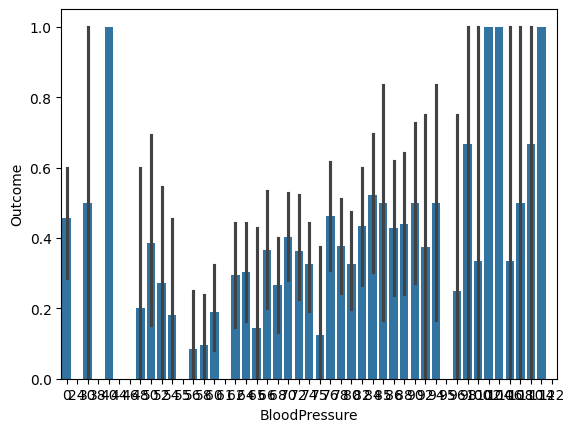

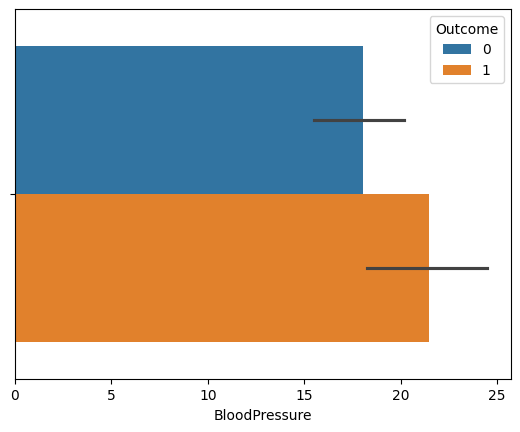

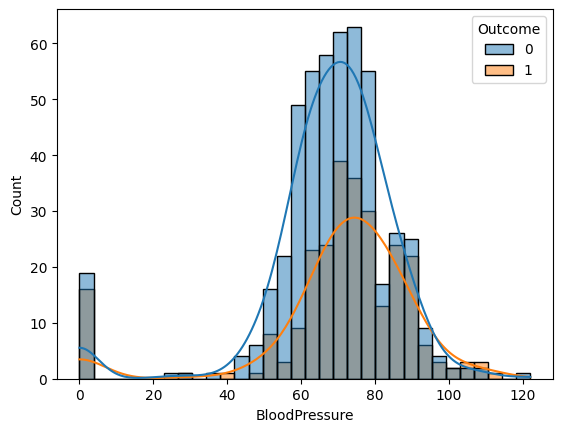

Reject H0


In [55]:
print(data['BloodPressure'].groupby (data['Outcome']).std())
print(data['BloodPressure'].groupby (data['Outcome']).mean())
print(data['BloodPressure'].groupby (data['Outcome']).count())

sns.barplot(x= data['BloodPressure'], y = data['Outcome'], estimator = 'mean' )
plt.show()
sns.barplot(x= data['BloodPressure'], hue =data['Outcome'], estimator = 'std')
plt.show()
sns.histplot(x = data['BloodPressure'], hue =data['Outcome'], data=data, kde=True)
plt.show()


die_bp=df['BloodPressure'][df['Outcome']==1]
nondie_bp=df['BloodPressure'][df['Outcome']==0]

# H0:Both data are same
# H1:Both are not same
from scipy.stats import ttest_ind

stat,p=ttest_ind(die_bp,nondie_bp)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

## Details for SkinThickness

Outcome
0    14.889947
1    17.679711
Name: SkinThickness, dtype: float64
Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64
Outcome
0    500
1    268
Name: SkinThickness, dtype: int64


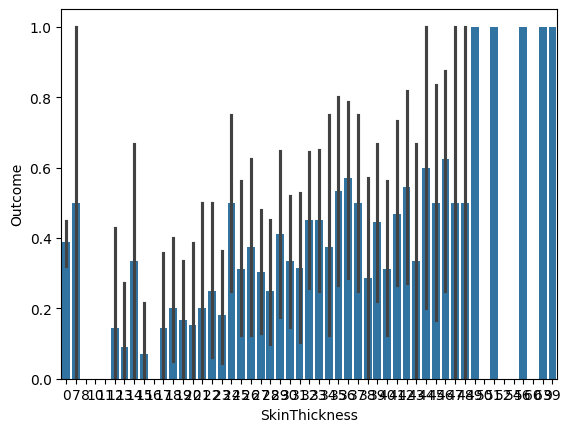

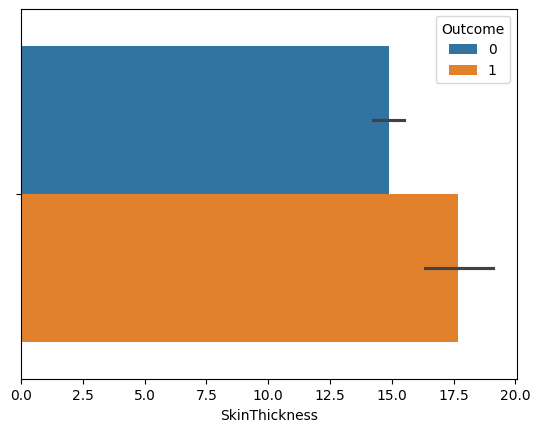

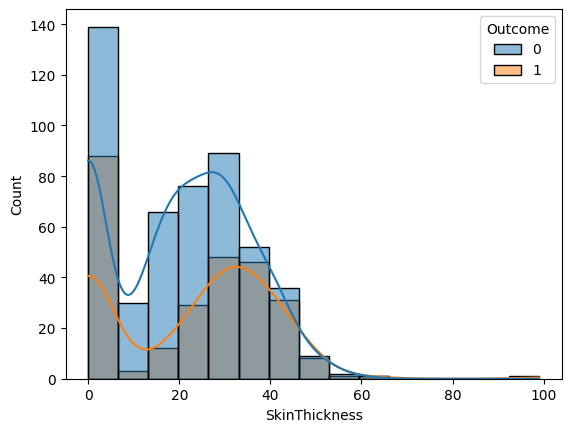

Reject H0


In [56]:
print(data['SkinThickness'].groupby (data['Outcome']).std())
print(data['SkinThickness'].groupby (data['Outcome']).mean())
print(data['SkinThickness'].groupby (data['Outcome']).count())

sns.barplot(x= data['SkinThickness'], y = data['Outcome'], estimator = 'mean' )
plt.show()
sns.barplot(x= data['SkinThickness'], hue =data['Outcome'], estimator = 'std')
plt.show()
sns.histplot(x = data['SkinThickness'], hue =data['Outcome'], data=data, kde=True)
plt.show()


die_st=df['SkinThickness'][df['Outcome']==1]
nondie_st=df['SkinThickness'][df['Outcome']==0]

# H0:Both data are same
# H1:Both are not same
from scipy.stats import ttest_ind

stat,p=ttest_ind(die_st,nondie_st)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

## Details for DiabetesPedigreeFunction

Outcome
0    0.299085
1    0.372354
Name: DiabetesPedigreeFunction, dtype: float64
Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64
Outcome
0    500
1    268
Name: DiabetesPedigreeFunction, dtype: int64


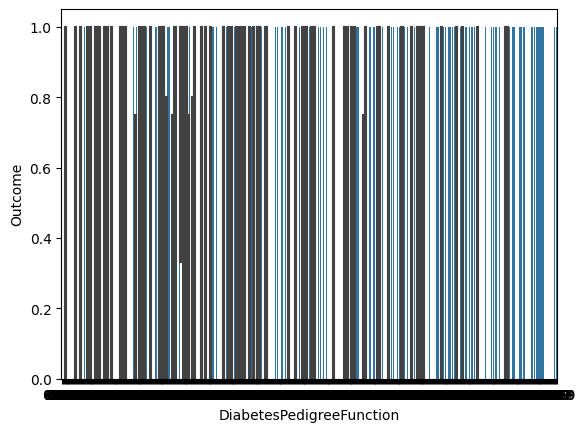

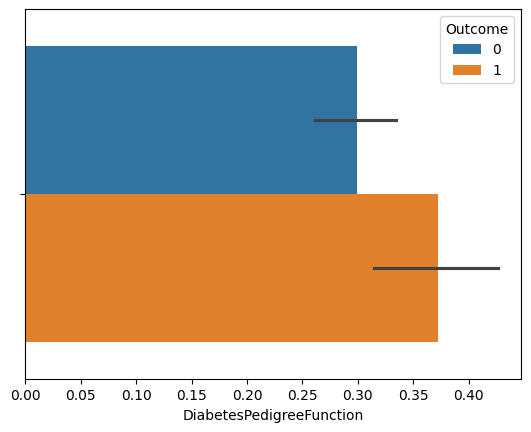

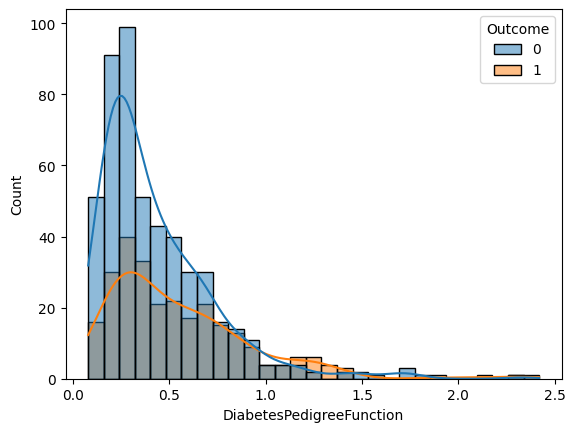

Reject H0


In [57]:
print(data['DiabetesPedigreeFunction'].groupby (data['Outcome']).std())
print(data['DiabetesPedigreeFunction'].groupby (data['Outcome']).mean())
print(data['DiabetesPedigreeFunction'].groupby (data['Outcome']).count())

sns.barplot(x= data['DiabetesPedigreeFunction'], y = data['Outcome'], estimator = 'mean' )
plt.show()
sns.barplot(x= data['DiabetesPedigreeFunction'], hue =data['Outcome'], estimator = 'std')
plt.show()
sns.histplot(x = data['DiabetesPedigreeFunction'], hue =data['Outcome'], data=data, kde=True)
plt.show()


die_dpf=df['DiabetesPedigreeFunction'][df['Outcome']==1]
nondie_dpf=df['DiabetesPedigreeFunction'][df['Outcome']==0]

# H0:Both data are same
# H1:Both are not same
from scipy.stats import ttest_ind

stat,p=ttest_ind(die_dpf,nondie_dpf)
alpha=0.05
if p<alpha:
    print('Reject H0')
else:
    print('Accept H0')

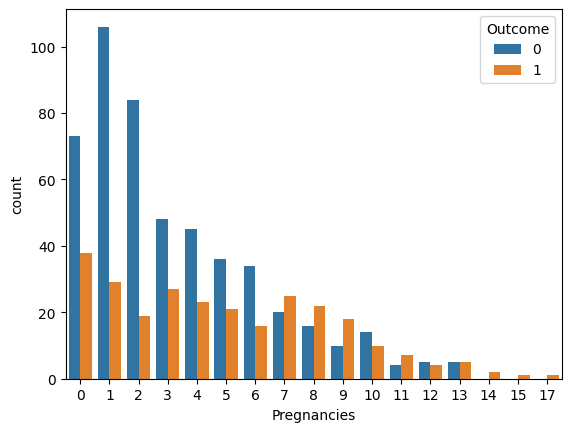

In [31]:
# Bivariate Analysis refers to plots between input and target variable.

## Analyzing how preganancies imact the patient with diabetes.

sns.countplot(x='Pregnancies' , hue='Outcome' , data=data )

plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split


scale_cols = [
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

train_pred=model.predict(X_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]

In [70]:
from sklearn.metrics import log_loss,accuracy_score,confusion_matrix
loss = log_loss(y_test, y_pred_prob)
print("Log Loss:", loss)

Log Loss: 0.5106228273115416


In [71]:
acc=accuracy_score(train_pred,y_train)
print(acc)

y_pred=model.predict(X_test)
acc1=accuracy_score(y_pred,y_test)
print(acc1)


0.770949720670391
0.7316017316017316


In [72]:
confusion_matrix(y_train,train_pred)

array([[307,  42],
       [ 81, 107]])

In [73]:
confusion_matrix(y_pred,y_test)

array([[122,  33],
       [ 29,  47]])

In [75]:
y_pred_prob = model.predict_proba(X_test)

y_pred_prob

array([[0.61723613, 0.38276387],
       [0.79817819, 0.20182181],
       [0.86629361, 0.13370639],
       [0.77743801, 0.22256199],
       [0.52218965, 0.47781035],
       [0.45599281, 0.54400719],
       [0.98303444, 0.01696556],
       [0.61920154, 0.38079846],
       [0.49073424, 0.50926576],
       [0.31493365, 0.68506635],
       [0.7422164 , 0.2577836 ],
       [0.16715031, 0.83284969],
       [0.54479085, 0.45520915],
       [0.78217718, 0.21782282],
       [0.9326515 , 0.0673485 ],
       [0.54171134, 0.45828866],
       [0.84017114, 0.15982886],
       [0.92421235, 0.07578765],
       [0.39189766, 0.60810234],
       [0.49181427, 0.50818573],
       [0.76625576, 0.23374424],
       [0.91767079, 0.08232921],
       [0.48740717, 0.51259283],
       [0.9173444 , 0.0826556 ],
       [0.50545248, 0.49454752],
       [0.19227416, 0.80772584],
       [0.86499416, 0.13500584],
       [0.96689291, 0.03310709],
       [0.72637928, 0.27362072],
       [0.90215789, 0.09784211],
       [0.

#### ✅ Final Summary

✔ Data imported and cleaned

✔ Missing values handled correctly

✔ Outliers treated safely

✔ EDA revealed meaningful medical patterns

✔ Correlation analysis identified key predictors